Seeing what's possible with two variables (2d chart)

In [2]:
import logging

import os
import sys
root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)

import numpy as np
import pandas as pd

from importlib import reload

from memory import garbage_collect

log = lambda msg: logging.info(msg)


# Load data

In [4]:
!pip install dotenv

In [5]:
from sleep_events import load_days_data

day_data = load_days_data(True)

In [9]:
[c for c in day_data.columns if 'dayAndNightOf' in c]


['dayAndNightOf', 'fitbit:heartrate:dayAndNightOf']

In [39]:
col1 = 'events:shower:lastSSM'
col2 = 'circadian:combined:entries:LEP:datetimeSSM'
c1 = 'shower'
c2 = 'LEP'

columns_to_select = [col1, col2]

df = day_data.copy()[columns_to_select]
df.index = day_data['dayAndNightOf']
import notebooks.Util.Time as Time
reload(Time)
df = Time.convert_cols_to_hours(df)


df[c1] = df[col1.replace(':lastSSM', ':last')]
df[c2] = df[col2.replace(':datetimeSSM', ':datetime')]
df.drop(columns=[col1.replace(':lastSSM', ':last'), col2.replace(':datetimeSSM', ':datetime')], inplace=True)

# Circadian data just gets better here. As I'm doing morning walks.
df = df[df.index >= '2024-08-14']
df = df[df[c1].notna() & df[c2].notna()]



df.head()
# df.fillna({"events:shower:lastSSM": 0, 
#            "events:shower:firstSSM": 0,
#            'events:shower:durationSecs': 0}, inplace=True)




,shower,LEP
dayAndNightOf,,
2024-08-18,14.766667,22.366667
2024-08-26,15.416667,21.200000
2024-09-15,18.250000,21.400000
2024-09-18,21.166667,21.933333
2024-09-28,18.833333,21.866667


In [18]:
!pip install matplotlib seaborn scipy


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


# Simple correlations

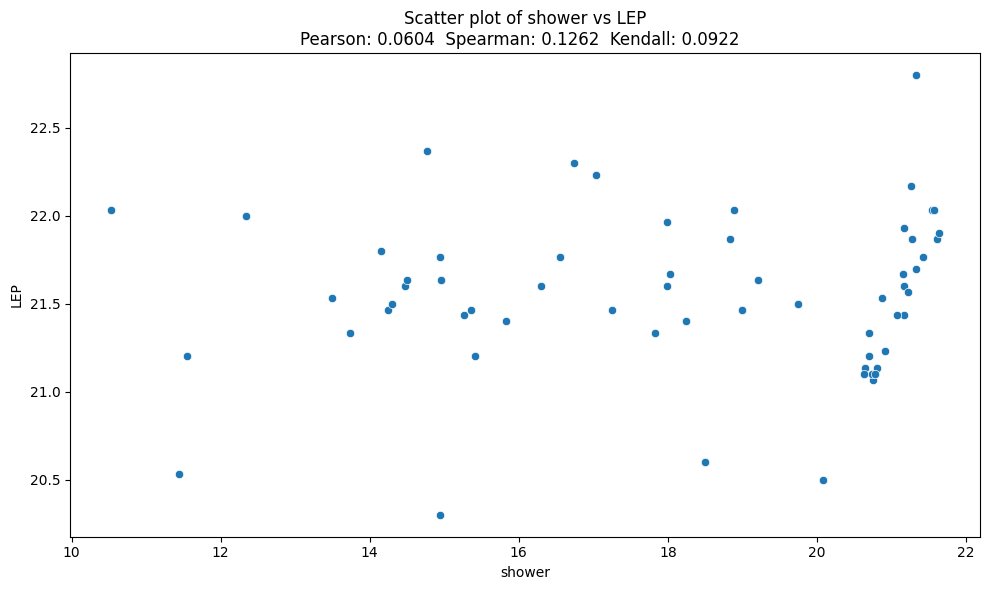

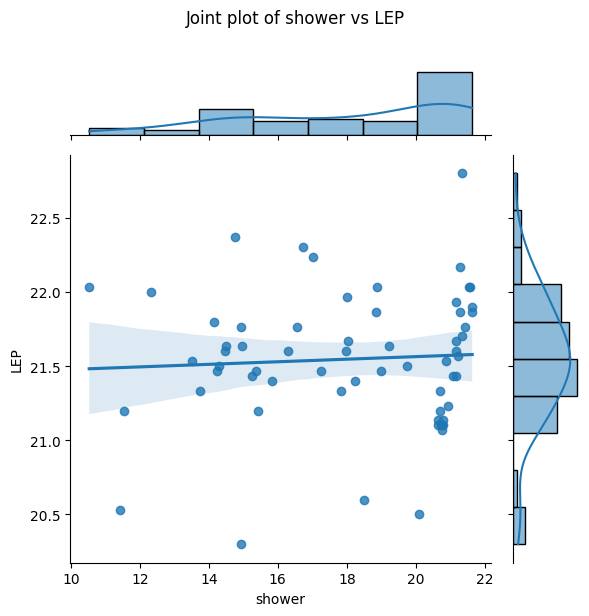

In [51]:
import stats_two_variables
reload(stats_two_variables)

results = stats_two_variables.calculate_correlations(df, c1, c2)
stats_two_variables.visualize_scatter(df, c1, c2, results)
stats_two_variables.visualize_joint_plot(df, c1, c2)


# Machine learning

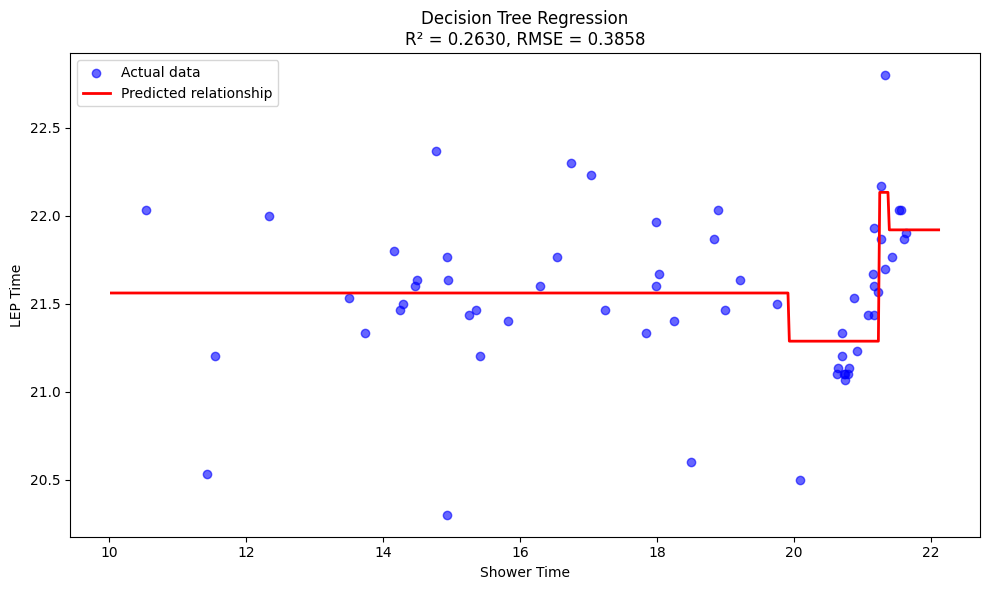

Decision Tree Regression Results:
R² score: 0.2630
RMSE: 0.3858


In [48]:
import stats_two_variables
reload(stats_two_variables)

models = stats_two_variables.fit_decision_tree_regressor(df, c1, c2, max_depth=2)

c:\Users\graha\.conda\envs\py3.13\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


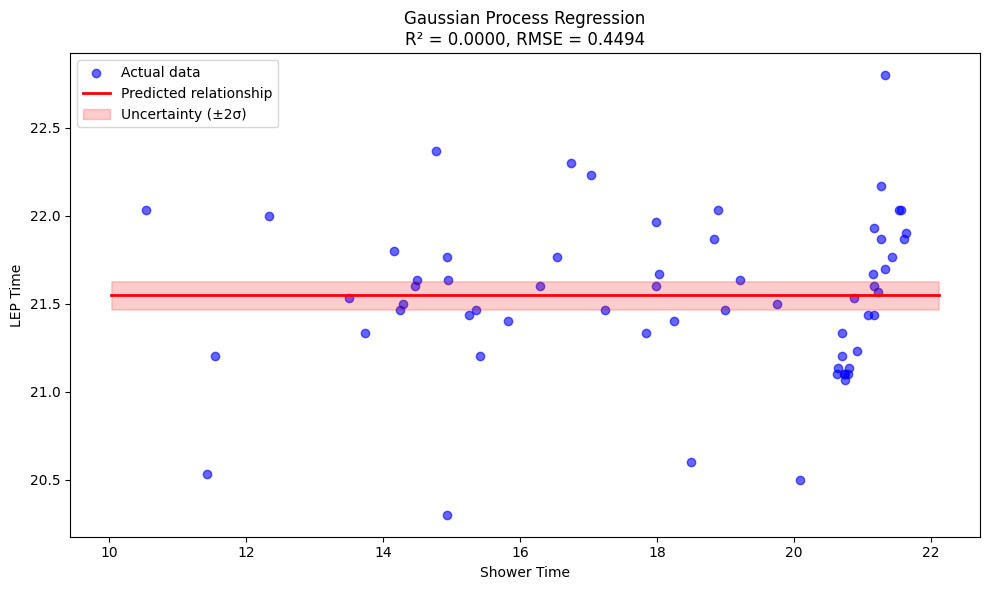

Gaussian Process Regression Results:
R² score: 0.0000
RMSE: 0.4494


In [52]:
import stats_two_variables
reload(stats_two_variables)

models = stats_two_variables.fit_gaussian_process_regressor(df, c1, c2)

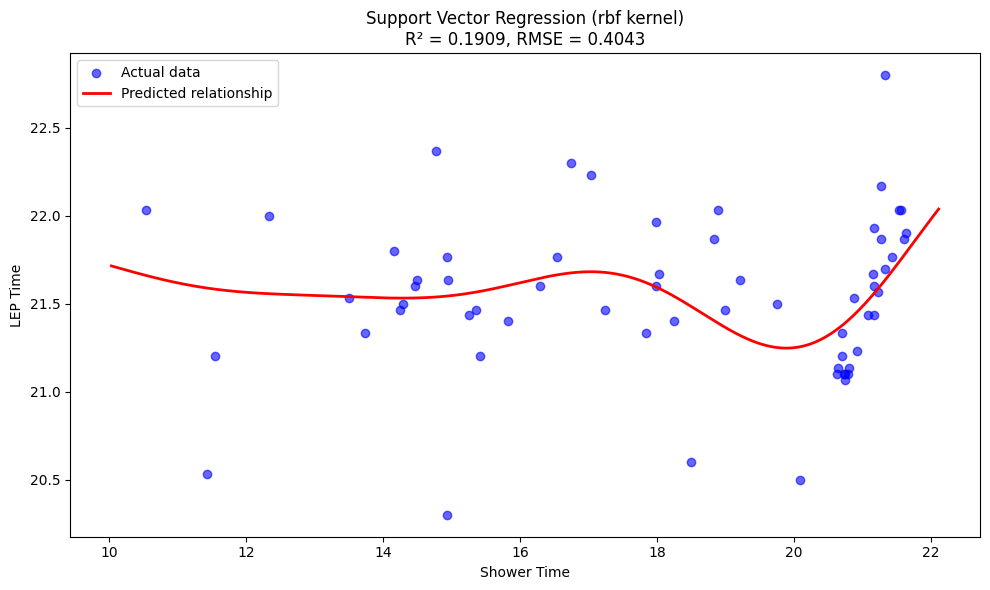

SVR with rbf kernel Results:
R² score: 0.1909
RMSE: 0.4043


In [59]:
import stats_two_variables
reload(stats_two_variables)

models = stats_two_variables.fit_svr(df, c1, c2, C=1.0)

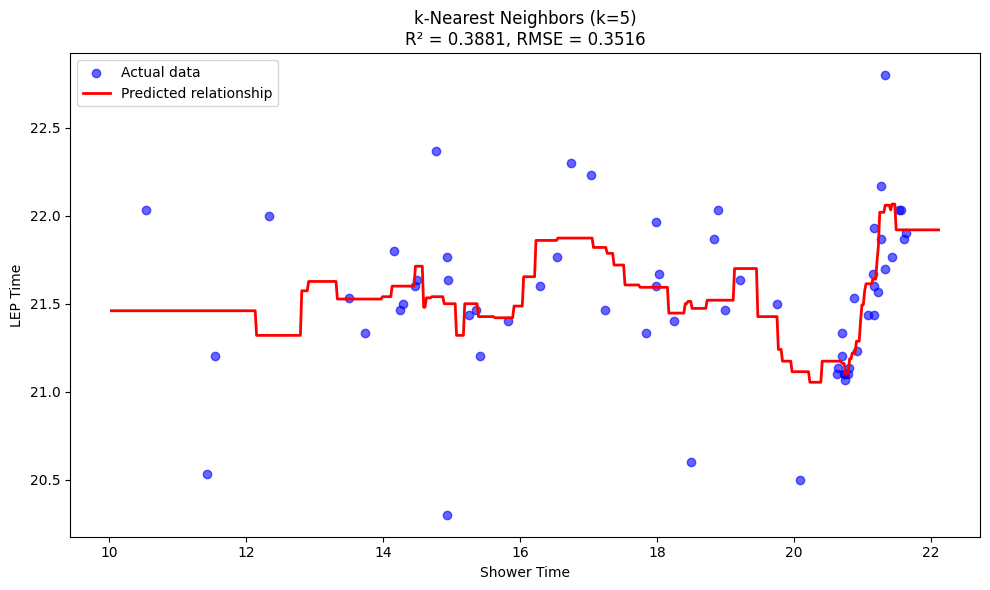

k-NN Regression Results:
R² score: 0.3881
RMSE: 0.3516


In [63]:
import stats_two_variables
reload(stats_two_variables)

models = stats_two_variables.fit_knn_regressor(df, c1, c2, n_neighbors=5)




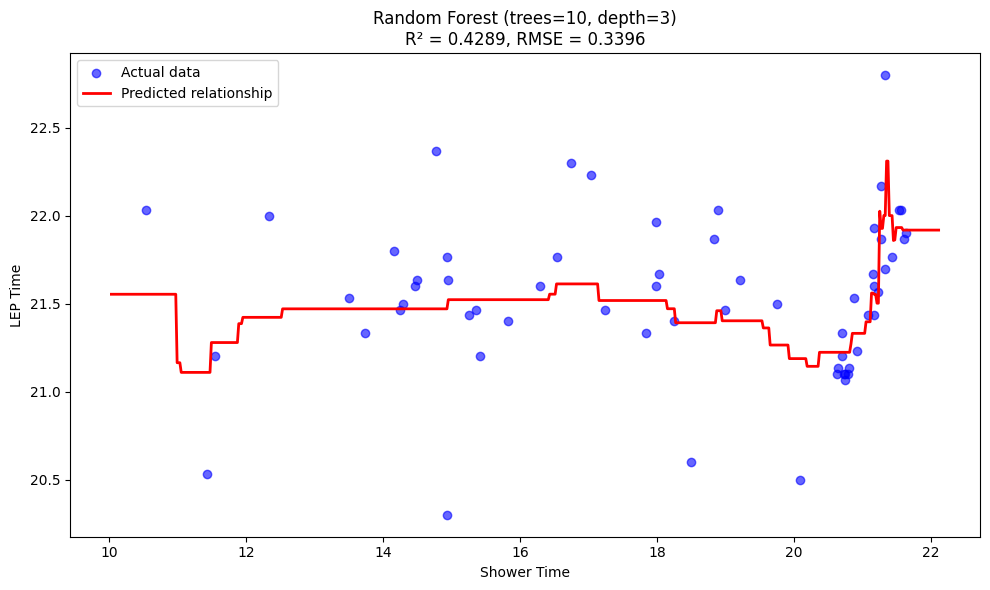

Random Forest Regression Results:
R² score: 0.4289
RMSE: 0.3396


In [65]:
import stats_two_variables
reload(stats_two_variables)

models = stats_two_variables.fit_random_forest_regressor(df, c1, c2, n_estimators=10, max_depth=3)
